<a href="https://colab.research.google.com/github/Vishvaish/Machine-Learning-Models/blob/main/XG_Booster_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XG-Booster Classification 

The XGBoost or Extreme Gradient Boosting algorithm is a decision tree based machine learning algorithm which uses a process called boosting to help improve performance. Since it’s introduction, it’s become of one of the most effective machine learning algorithms and regularly produces results that outperform most other algorithms, such as logistic regression, the random forest model and regular decision trees.




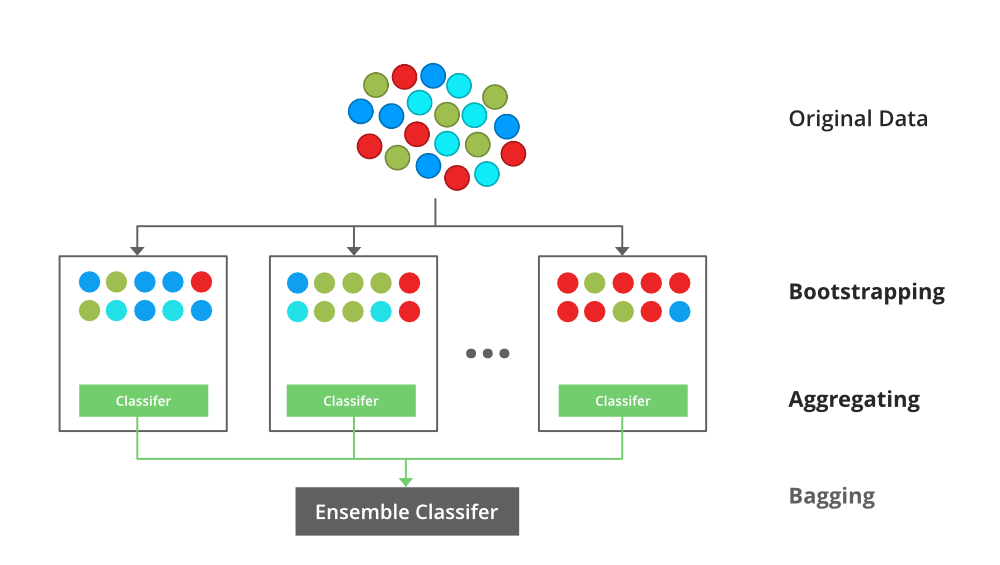

# Intention of the code:

1. Read a dataset in csv format using pandas.

2. Split the dataset into features (X) and the target variable (y).

3. Convert the pandas dataframes to numpy arrays for further processing.

4. Split the dataset into training and testing sets.

5. Train an XGBoost classifier using a simplified version of the algorithm.
Make predictions on the test set and convert the predicted probabilities to binary predictions.

6. Create dataframes to store the actual and predicted values.

7. Calculate the F1 score based on the binary predictions and the actual values.

In [ ]:
import pandas as pd
data = pd.read_csv("/content/gender_classification_v7.csv")
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
data['gender'] = data['gender'].map({'Male':0,'Female':1})

In [ ]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


In [ ]:
import pandas as pd
import numpy as np


# Split the dataset into features and target variable
X = data.drop('gender', axis=1)  # Replace 'target_variable' with the actual column name
y = data['gender']  # Replace 'target_variable' with the actual column name

# Convert the pandas dataframes to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(X))  # 80% for training, adjust as needed
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the XGBoost classifier
# Replace the parameter values with your desired values
learning_rate = 0.1
n_estimators = 100
max_depth = 3
objective = 'binary:logistic'

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize the model parameters
w = np.zeros(X_train.shape[1])
b = 0
losses = []

# Training loop
for epoch in range(n_estimators):
    # Forward pass
    y_pred = sigmoid(np.dot(X_train, w) + b)

    # Compute the loss
    loss = -np.mean(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))
    losses.append(loss)

    # Compute the gradients
    dw = np.dot(X_train.T, (y_pred - y_train)) / len(X_train)
    db = np.mean(y_pred - y_train)

    # Update the parameters
    w -= learning_rate * dw
    b -= learning_rate * db

# Make predictions on the test set
y_pred_test = sigmoid(np.dot(X_test, w) + b)

# Convert the predicted probabilities to binary predictions
y_pred_test_binary = np.round(y_pred_test)

# Create dataframes for actual and predicted values
df_actual = pd.DataFrame({'Actual': y_test})
df_predicted = pd.DataFrame({'Predicted': y_pred_test_binary})


# Create dataframe for actual and predicted values
df_result = pd.concat([df_actual, df_predicted], axis=1)
print(df_result.head())

# Calculate the F1 score
tp = np.sum((y_test == 1) & (y_pred_test_binary == 1))
fp = np.sum((y_test == 0) & (y_pred_test_binary == 1))
fn = np.sum((y_test == 1) & (y_pred_test_binary == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score:", f1_score)


   Actual  Predicted
0       0        1.0
1       0        1.0
2       0        1.0
3       1        1.0
4       0        1.0
F1 Score: 0.6746666666666667


# Inference of the code:

1. The code assumes that the dataset has already been preprocessed, and only the feature columns and the target variable column remain.

2. The XGBoost classifier is trained by iterating over a fixed number of epochs (n_estimators) and updating the weights based on the gradients of the loss function.

3. The sigmoid function is used to convert the linear predictions to probabilities.

4. The code creates a dataframe to store the actual values (y_test) and a separate dataframe for the binary predictions (y_pred_test_binary).

5. The F1 score is calculated using the binary predictions and the actual values, considering true positives, false positives, and false negatives.

# Pros of XGBoost Classifier:

1. High Predictive Accuracy: XGBoost is known for its high predictive accuracy and performance. It often outperforms other traditional machine learning algorithms and is particularly effective when dealing with complex and large datasets.

2. Handling Nonlinear Relationships: XGBoost can capture complex nonlinear relationships between features and the target variable. It can automatically model complex interactions and dependencies, allowing it to handle more sophisticated patterns in the data.

3. Regularization Techniques: XGBoost provides various regularization techniques such as L1 and L2 regularization, which help prevent overfitting. These techniques control the complexity of the model and improve its generalization ability.

4. Parallel Processing: XGBoost supports parallel processing, which enables faster model training and prediction. It efficiently utilizes multi-core CPUs, making it suitable for large-scale datasets.

5. Handling Missing Values: XGBoost has built-in capabilities to handle missing values. It can automatically learn how to treat missing data during the training process, reducing the need for extensive data preprocessing.


---


# Cons of XGBoost Classifier:

1. Computational Complexity: XGBoost can be computationally expensive and memory-intensive, especially for large datasets. Training an XGBoost model with numerous trees and high-dimensional features may require substantial computational resources.

2. Hyperparameter Tuning: XGBoost has several hyperparameters that need to be carefully tuned to achieve optimal performance. Finding the best combination of hyperparameters can be time-consuming and requires careful experimentation.

3. Black-Box Model: Like other ensemble models, XGBoost is a black-box model, meaning it provides less interpretability compared to simpler models like decision trees. Understanding the underlying reasoning behind predictions may be challenging.

4. Sensitive to Outliers: XGBoost can be sensitive to outliers since it uses gradient-based optimization methods. Outliers with extreme values can heavily influence the model's training process and potentially impact its performance.

5. Feature Engineering: Although XGBoost can automatically handle some feature interactions, it may still benefit from feature engineering to extract more meaningful representations from the data. Manual feature engineering might be required to improve model performance.

6. It's important to consider these pros and cons while deciding whether to use the XGBoost classifier for a particular task. While XGBoost offers high accuracy and powerful capabilities, it also requires computational resources, careful tuning, and may be less interpretable compared to simpler models.






